# **Assignment: Detect Hand Guestures**


# Requirement:  
* Build a Computer Vision Application to Detect Hand Gestures.
* Focus is on 3 Gestures. Rock, Paper, Scissor


# INSTRUCTIONS:
* Make your own copy of the Notebook before starting the assignment.
  **File** -> **save a copy in Drive**

* Fill the place holders in the notebook which are indicated with the 'FILL:' Key word.

## Download & Extract Rock-Paper-Scissor Datasets

Link to the dataset: https://www.tensorflow.org/datasets/catalog/rock_paper_scissors



In [1]:
!mkdir ./tmp

mkdir: cannot create directory ‘./tmp’: File exists


Train Dataset

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/download.tensorflow.org/data/rps.zip \
    -O ./tmp/rps.zip


--2024-07-13 16:45:09--  https://storage.googleapis.com/download.tensorflow.org/data/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 142.250.4.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘./tmp/rps.zip’

./tmp/rps.zip       100%[===================>] 191.38M  8.50MB/s    in 25s     

2024-07-13 16:45:35 (7.81 MB/s) - ‘./tmp/rps.zip’ saved [200682221/200682221]



Validation Dataset

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip \
    -O ./tmp/rps-test-set.zip

--2024-07-13 16:45:35--  https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 142.250.4.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘./tmp/rps-test-set.zip’

./tmp/rps-test-set. 100%[===================>]  28.15M  6.85MB/s    in 5.5s    

2024-07-13 16:45:42 (5.12 MB/s) - ‘./tmp/rps-test-set.zip’ saved [29516758/29516758]



## Use Zipfile to extract the files

In [4]:
import zipfile
import os

In [5]:
def extract_file(src, dest):
  # opening the zip file in READ mode
  with zipfile.ZipFile(src, 'r') as zip:
      # extracting all the files
      print(f'Extracting all the files from {src}...')
      zip.extractall(dest)
      print('Done!')

In [6]:
extract_file(src='./tmp/rps.zip', dest='./data')
extract_file(src='./tmp/rps-test-set.zip', dest='./data')

Extracting all the files from ./tmp/rps.zip...
Done!
Extracting all the files from ./tmp/rps-test-set.zip...
Done!


In [7]:
def get_image_counts(parent_folder, dataset_name):
  rock_dir = os.path.join(parent_folder, 'rock')
  paper_dir = os.path.join(parent_folder, 'paper')
  scissors_dir = os.path.join(parent_folder, 'scissors')

  print(f'total {dataset_name} rock images: {len(os.listdir(rock_dir))}')
  print(f'total {dataset_name} paper images: {len(os.listdir(paper_dir))}')
  print(f'total {dataset_name} scissors images: {len(os.listdir(scissors_dir))}')

In [8]:
get_image_counts(parent_folder='./data/rps', dataset_name='training')

total training rock images: 840
total training paper images: 840
total training scissors images: 840


In [9]:
get_image_counts(parent_folder='./data/rps-test-set', dataset_name='testing')

total testing rock images: 124
total testing paper images: 124
total testing scissors images: 124


# Training Pipeline Implementation

## Import Required Libraries

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

2024-07-13 16:45:43.747576: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-13 16:45:43.767969: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 16:45:43.784734: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 16:45:43.784768: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-13 16:45:43.795771: I tensorflow/core/platform/cpu_feature_gua

### 2.1. Visualize Data

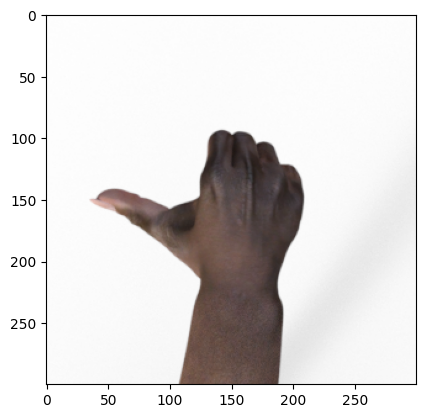

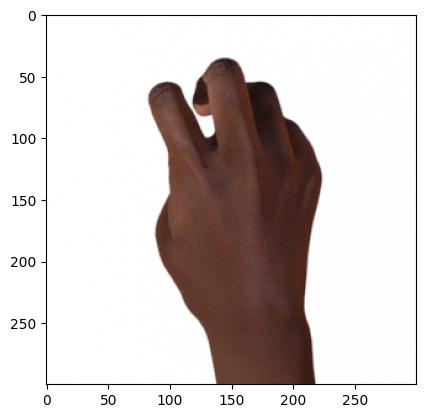

(300, 300, 3)


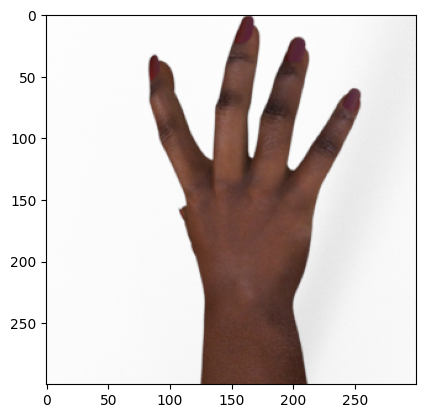

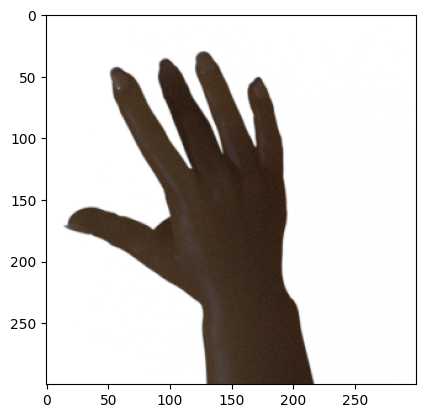

(300, 300, 3)


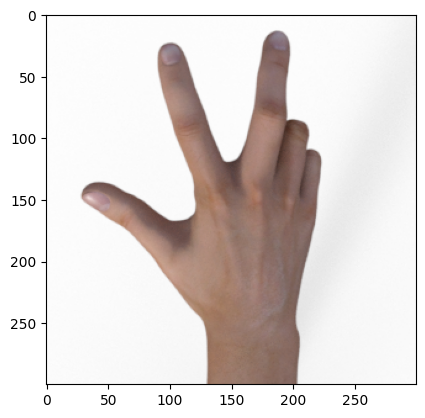

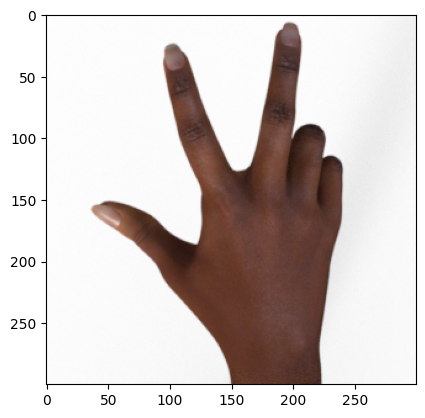

(300, 300, 3)


In [11]:
for label in ['rock', 'paper', 'scissors']:
  im_folder = f'./data/rps/{label}'
  im_count = 2
  for im_name in  os.listdir(im_folder)[:im_count]:
      im_path = os.path.join(im_folder, im_name)
      img = Image.open(im_path).convert('RGB')
      img = np.asarray(img)
      # plt.title(f'Label: { y_test[i]}')
      plt.imshow(img)
      plt.show()
  print(img.shape)

# Use Image Data Generator to Pre-process and to Feed data to the training pipeline

## Requirement:
### 1.Resize Images to (128, 128)
### 2.Rescale images to (0 - 1.) range
### 3. Use batch_size: 64
### 4.Augment only the training data.
### 5. Augmentations to be used,
        rotation_range=40
        width_shift_range=0.2
        height_shift_range=0.2
        shear_range=0.2
        zoom_range=0.2
        horizontal_flip=True
        fill_mode='nearest'
    

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "./data/rps/"
training_datagen = ImageDataGenerator(
    # FILL: Create the training_datagen ImageDataGenerator, according to the above mentioned requirements.
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
      )

VALIDATION_DIR = "./data/rps-test-set/"
validation_datagen = ImageDataGenerator(
      # FILL: Create the validation_datagen ImageDataGenerator, according to the above mentioned requirements.
      rescale = 1./255
      )

train_generator = training_datagen.flow_from_directory(
    # FILL: Create the train_generator to flow the ImageDataGenerator images from TRAINING_DIR directory, according to the above mentioned requirements.
    TRAINING_DIR,
	target_size=(128, 128),
	class_mode='categorical', 
    batch_size=64
)

validation_generator = validation_datagen.flow_from_directory(
    # FILL: Create the train_generator to flow the ImageDataGenerator images from VALIDATION_DIR directory, according to the above mentioned requirements.
    VALIDATION_DIR,
	target_size=(128, 128),
	class_mode='categorical',
    batch_size=64

)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


## Create a model according to the below configuration.
### Need to have 4 convolutional blocks. Use **ReLU** activation for all convolution layers.
  first convolution block:

    Kernal Shape= (3,3)
    Number of Filters 64
  
  second convolution block:

    Kernal Shape= (3,3)
    Number of Filters 64

  third convolution block:

    Kernal Shape= (3,3)
    Number of Filters 128

  fourth convolution block:

    Kernal Shape= (3,3)
    Number of Filters 128

### Need to have 2 Dense Layers. Use **ReLU** activation for the first Dense layer. Use a suitable activation function for the Dense final layer.

  first dense layer:

    Number of Nodes= 512
    Activation Function: ReLU
    
    Note: It is advisable to use dropout with a suitable drop probability for the flattened input; just before feeding into the first dense layer.

  second (final) dense layer:

    Number of Nodes: Decide based on the Task
    Activation Function: Decide based on the Task

In [13]:
model = tf.keras.models.Sequential([
    # FILL: Complete the CNN model based on the above mentioned requirements.
    # This is the first convolution block
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # The second convolution block
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # The third convolution block
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # The fourth convolution block
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    # Add a Dropout with a suitable probability
    tf.keras.layers.Dropout(0.5),

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    # Output layer with Softmax activation.
    tf.keras.layers.Dense(3, activation='softmax')

])
model.summary()

/home/pankaja/anaconda3/envs/tf-dev/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-07-13 16:45:46.571457: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-13 16:45:46.595891: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-13 16:45:46.595922: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,621,507 (10.00 MB)

 Trainable params: 2,621,507 (10.00 MB)

 Non-trainable params: 0 (0.00 B)

## Class names order

In [14]:
class_names = sorted(os.listdir('./data/rps'))
class_names

['paper', 'rock', 'scissors']

## Define a suitable preprocessing function to,
1. resize the given image to the expected input size.
2. Normalize images from [0, 255] to [0, 1] range.
3. Make sure to expand the first dimension before feeding the image to the NN


In [15]:
def im_preprocess(img_path, display=False):
  # FILL: im_preprocess function.
  img = Image.open(img_path).convert('RGB')  # (300, 300, 3)
  newsize = (128, 128)
  img = img.resize(newsize)

  img = np.asarray(img)
  img = img/255.

  
  if display:
    plt.imshow(img)
    plt.show()
  
  img = np.expand_dims(img, axis=0) # (1, 128, 128, 3)
  return img


## Predict before training.

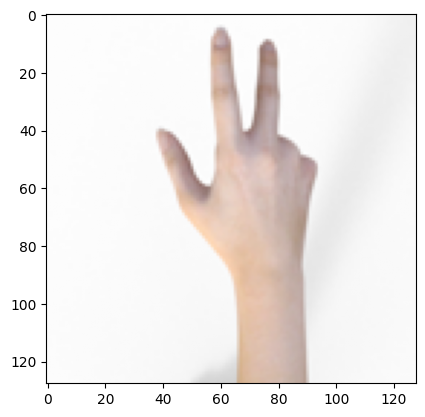

In [16]:
im_path = './data/rps/scissors/scissors01-004.png'
img = im_preprocess(img_path=im_path, display=True)

In [17]:
pred_b4_training = model.predict(img)
print(pred_b4_training)
print('\n Prediction before Training:', np.argmax(pred_b4_training))

I0000 00:00:1720869347.351090  144484 service.cc:145] XLA service 0x7f95f40061b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1720869347.351144  144484 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-07-13 16:45:47.357288: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-13 16:45:47.390216: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
[[0.34792298 0.31342846 0.33864862]]

 Prediction before Training: 0


I0000 00:00:1720869347.845998  144484 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


## Train the model.

### Define tensorboard_callback

In [18]:
# Use tensorboard_callback for training.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

In [19]:
# FILL: compile model with a suitable Loss Function. Use Adam Optimizer with learning_rate=1e-3
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
             loss = 'categorical_crossentropy', metrics=[keras.metrics.CategoricalAccuracy()])

In [20]:
# FILL: Feed the train_generator to train the model for 25 epochs,
# Use validation data to validate the model
# Use tensorboard_callback for training.
hist = model.fit(train_generator, epochs = 25, validation_data = validation_generator, callbacks=[tensorboard_callback])

Epoch 1/25


/home/pankaja/anaconda3/envs/tf-dev/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - categorical_accuracy: 0.3530 - loss: 1.1366

I0000 00:00:1720869381.458856  145066 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_112', 8 bytes spill stores, 8 bytes spill loads



40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 317ms/step - categorical_accuracy: 0.3540 - loss: 1.1354 - val_categorical_accuracy: 0.7124 - val_loss: 0.9269
Epoch 2/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step - categorical_accuracy: 0.5768 - loss: 0.8711 - val_categorical_accuracy: 0.8790 - val_loss: 0.2631
Epoch 3/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - categorical_accuracy: 0.7671 - loss: 0.5674 - val_categorical_accuracy: 0.9516 - val_loss: 0.3113
Epoch 4/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - categorical_accuracy: 0.8460 - loss: 0.4295 - val_categorical_accuracy: 0.9731 - val_loss: 0.1355
Epoch 5/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - categorical_accuracy: 0.8962 - loss: 0.2966 - val_categorical_accuracy: 0.9812 - val_loss: 0.0742
Epoch 6/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 178ms/step - categorical_accuracy: 0.9172 - loss: 0.2255 - val_categorical_accuracy: 0.9651 - val_loss: 0.1033
Epoch 7/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - categorical_accuracy: 0.8952 - loss: 0.3035

## Evaluate trained Model

In [21]:
# FILL: Evaluate the model on the test data using `evaluate`. Expected Result: 95+%  Accuracy.
print("Evaluate on test data")
results = model.evaluate(validation_generator, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - categorical_accuracy: 0.8956 - loss: 0.3906
test loss, test acc: [0.35115963220596313, 0.9032257795333862]


### Save Trained Model

In [22]:
model.save("rps_model.h5")

### Load Trained Model

In [23]:
trained_model = keras.models.load_model('rps_model.h5')

## Run Inference after training

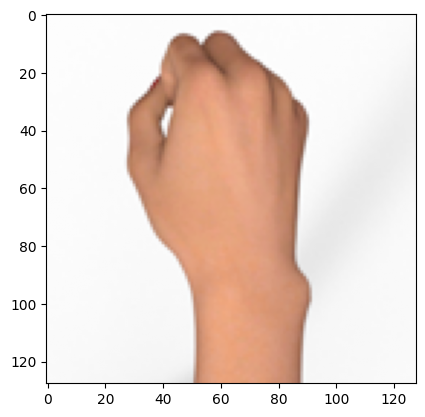

In [24]:
im_path = './data/rps-test-set/rock/testrock01-05.png'
img = im_preprocess(img_path=im_path, display=True)

In [25]:
pred_after_training = trained_model.predict(img)
print(pred_after_training)
print('\n Prediction after Training:', class_names[np.argmax(pred_after_training)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
[[1.8129217e-04 9.9981844e-01 1.9635368e-07]]

 Prediction after Training: rock


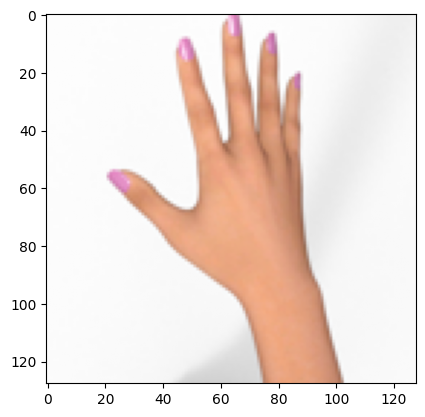

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[9.7690696e-01 1.1671834e-04 2.2976397e-02]]

 Prediction after Training: paper


In [26]:
im_path = './data/rps-test-set/paper/testpaper01-07.png'
img = im_preprocess(img_path=im_path, display=True)

pred_after_training = trained_model.predict(img)
print(pred_after_training)
print('\n Prediction after Training:', class_names[np.argmax(pred_after_training)])

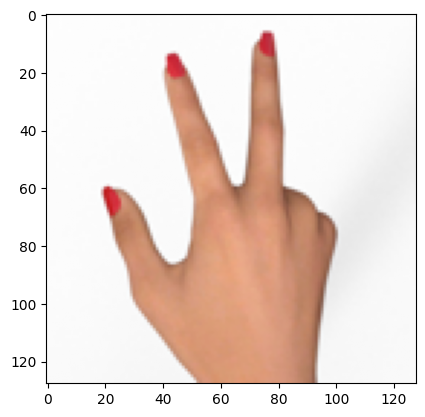

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[2.3290329e-04 2.0375225e-04 9.9956328e-01]]

 Prediction after Training: scissors


In [27]:
im_path = './data/rps-test-set/scissors/testscissors01-10.png'
img = im_preprocess(img_path=im_path, display=True)

pred_after_training = trained_model.predict(img)
print(pred_after_training)
print('\n Prediction after Training:', class_names[np.argmax(pred_after_training)])

## Visualize training with tensorboard.

In [28]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [29]:
%tensorboard --logdir './logs'